# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2025/)    
## 1MS041, 2025 
&copy;2025 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## A great set of lectures in Optimisation in next URL

You have seen some methods in scientific computing and will see more in your programme.

Here we just use some basic methods in numerical optimisation to be able to find the maximum likelihood estimate.

Note that in optimisation one is interested in minimising a cost or loss, so we are interested in the following

$$\hat \theta = \arg\min_{\theta \in \mathbf{\Theta}} - \log(L(\theta))$$

In [1]:
from Utils import showURL
showURL("https://scipy-lectures.org/advanced/mathematical_optimization/index.html",500)

**2.7.2.1. Getting started: 1D Optimisation**

This example is from https://scipy-lectures.org/advanced/mathematical_optimization/index.html#id38

> Let’s get started by finding the minimum of the scalar function $f(x)=\exp(x-0.7)^2$. 
> `scipy.optimize.minimize_scalar()` uses Brent’s method to find the minimum of a function

See [docs for `scipy.optimize.minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar).

In [2]:
# Example from https://scipy-lectures.org/advanced/mathematical_optimization/index.html#id38

import numpy as np # import numpy for np.methods
# import optimize from scipy to do numerical optimization
from scipy import optimize

#define the function f we want to minimize - see points plot below
def f(x):
    return -np.exp(-(x - 0.7)**2)

#call the optimize.minimize_scalar method to find the minimim, argmin, etc.
result = optimize.minimize_scalar(f)

print ("result.success = " + str(result.success)) # check if solver was successful

# argmin, i.e., the x that minimizes f(x)
x_min = result.x

# note argmin is close to the true argmin at 0.7
print("argmin_x of f(x) = " + str(x_min)) 

result.success = True
argmin_x of f(x) = 0.6999999997839409


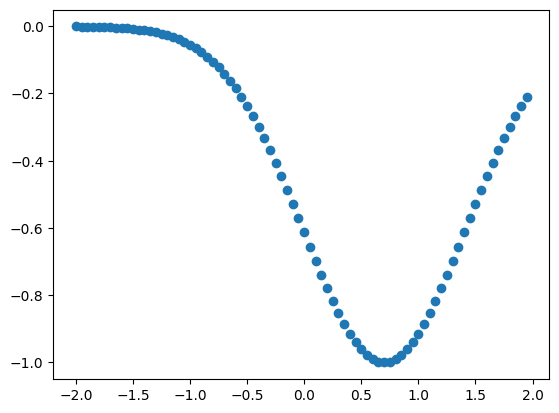

In [3]:
xValuesToPlot=np.arange(-2.0,2.0,0.05)
import matplotlib.pyplot as plt
plt.scatter(xValuesToPlot,f(xValuesToPlot))

In [4]:
# the value of the function's minimum, number of function evaluations, number of iterations
print (result.fun, result.nfev, result.nit)

-1.0 12 9


In [5]:
result # we can see result directly too

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.0
       x: 0.6999999997839409
     nit: 9
    nfev: 12

### Bounded 1D Optimisation

In MLe problems we often want to optimise or minimise $f(x)$ while constraining of bounding $x$ to be inside an interval, say $[0,1]$. This is possible using `method='bounded'` in our previous example. The implementation uses Brent's method under the set constraints. 

See [docs for `scipy.optimize.minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar).

In [6]:
import numpy as np
from scipy import optimize

def f(x):
    return -np.exp(-(x - 0.7)**2)

initial_x = 0.5 # this is where we are initialising the iterative search
boundedResult = optimize.minimize_scalar(f, initial_x, bounds=(0, 1), method='bounded')
boundedResult

 message: Solution found.
 success: True
  status: 0
     fun: -0.9999999999997916
       x: 0.6999995435529417
     nit: 8
    nfev: 8

### Maximum Likelihood Estimate using Optimisation

Let us apply the above idea in **Bounded 1D Optimisation** to find the MLe for statistical experiments from $n$ IID samples that are assumed to drawn from a random variable with only one real-valued parameter that satisfies some given  constraints.

We can thus get the MLe by minimising the negative log likelihood function *numerically* using *floating-point numbers* via `numpy` ans `scipy` libraries/packages (such methods are also  called *scientific computing*) .

This approach is easier in a sense as you only need the likelhood expression, however, it comes at a price. The solutions do not in general have guarantees unless various conditions are satisfied. However, a lot of successful methods in statistical machine learning and AI are based on such methods!

## Multi-dimensional Constrained Optimisation

The following example is from [2.7.7.1. Box bounds](https://scipy-lectures.org/advanced/mathematical_optimization/index.html#id54) of [scipy lectures on mathematical optimisation](https://scipy-lectures.org/advanced/mathematical_optimization/index.html).

We want to find the argument that minimises the function $f$ of two variables $(x_1,x_2)$
$$
argmin_{(x_1,x_2) \in [-1.5,1.5]^2} f(x_1,x_2) = \sqrt{\left( (x_1 - 3)^2 + (x_2 - 2)^2 \right)}
$$
but while constraining $(x_1,x_2)$ to lie within the bounding box given by the square $[-1.5,1.5]^2 := [-1.5,1.5] \times [-1.5,1.5]$.

<br>
<br>

<img src="https://scipy-lectures.org/_images/sphx_glr_plot_constraints_002.png">

<br>

We can use this iterative numerical method called `optimize.minimize` to find the MLe of statistical experiments that have more than one parameter using:

- the numerical expression for a function `f` we want to minimise
  - for us, `f` will be `negLogLkl`, the negative log likelihood function (or any other loss for that matter), for a given `dataset`
- specifying `parameter_bounding_box`, the appropriate bounding boxes for the parameters (so the likelihood is well-defined)
- specifying `initial_arguments` for the initial values for the parameters in the iterative `optimize.minimize` method
  - make sure the initial value is within the bounding box!

You should have seen these ideas in some form in your scientific computing courses, if not, don't worry as you will see them soon in more advanced scientific computing courses you will be taking in the future.

If you want to use the source to deepen your understanding through a great set of codes and lecture notes that will help you understand what is going on when we call `optimize.minimize` method, then please feel free to dive here:

- [https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_gradient_descent.html#sphx-glr-advanced-mathematical-optimization-auto-examples-plot-gradient-descent-py](https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_gradient_descent.html#sphx-glr-advanced-mathematical-optimization-auto-examples-plot-gradient-descent-py)

In [7]:
import numpy as np
from scipy import optimize

# define the objective/cost/loss function we want to minimise
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

# multi-dimensional optimisation is syntactically similar to 1D, 
# but we are using Gradient and Hessian information from numerical evaluation of f to 
# iteratively improve the solution along the steepest direction, etc. 
# It 'LBFGS' method you will see in scientific computing
parameter_bounding_box=((-1.5, 1.5), (-1.5, 1.5)) # specify the constraints for each parameter
initial_arguments = np.array([0, 0]) # point in 2D to initialise the minimize algorithm
optimize.minimize(f, initial_arguments, bounds=parameter_bounding_box) # just call the minimize method!
# notuce that the argmin x = (1.5,1,5) within the bounding-box.

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: 1.5811388300841898
        x: [ 1.500e+00  1.500e+00]
      nit: 2
      jac: [-9.487e-01 -3.162e-01]
     nfev: 9
     njev: 3
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>